# Premières manipulations des données

In [140]:
#Import
import pandas as pd
import numpy as np
import operator

#Train et test
from sklearn.model_selection import train_test_split

In [2]:
#Import des jeux de données de Toulouse et du Languedoc
path_jeu1 = 'C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID/Interpromo/PIP_2022NA/DATA1/DATA1/DONNEES_BRUTES/'
df_jeu1_toulouse = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_TOULOUSE.csv')

df_jeu1_languedoc = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_LANGUEDOC.csv')

In [158]:
#Import du jeu de données complet
data1 = pd.read_csv('C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID/Interpromo/PIP_2022NA/DATA1/DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv')
data1

MemoryError: Unable to allocate 6.48 MiB for an array with shape (849346,) and data type float64

## Statistiques descriptives##

In [127]:
import matplotlib.pyplot as plt

### Proportion des clients par profils (hyper actifs, très peu actifs, ...)

In [24]:
df_jeu1_toulouse['profil'] = df_jeu1_toulouse['profil'].apply(lambda x:str(x))
df_jeu1_languedoc['profil'] = df_jeu1_languedoc['profil'].apply(lambda x:str(x))

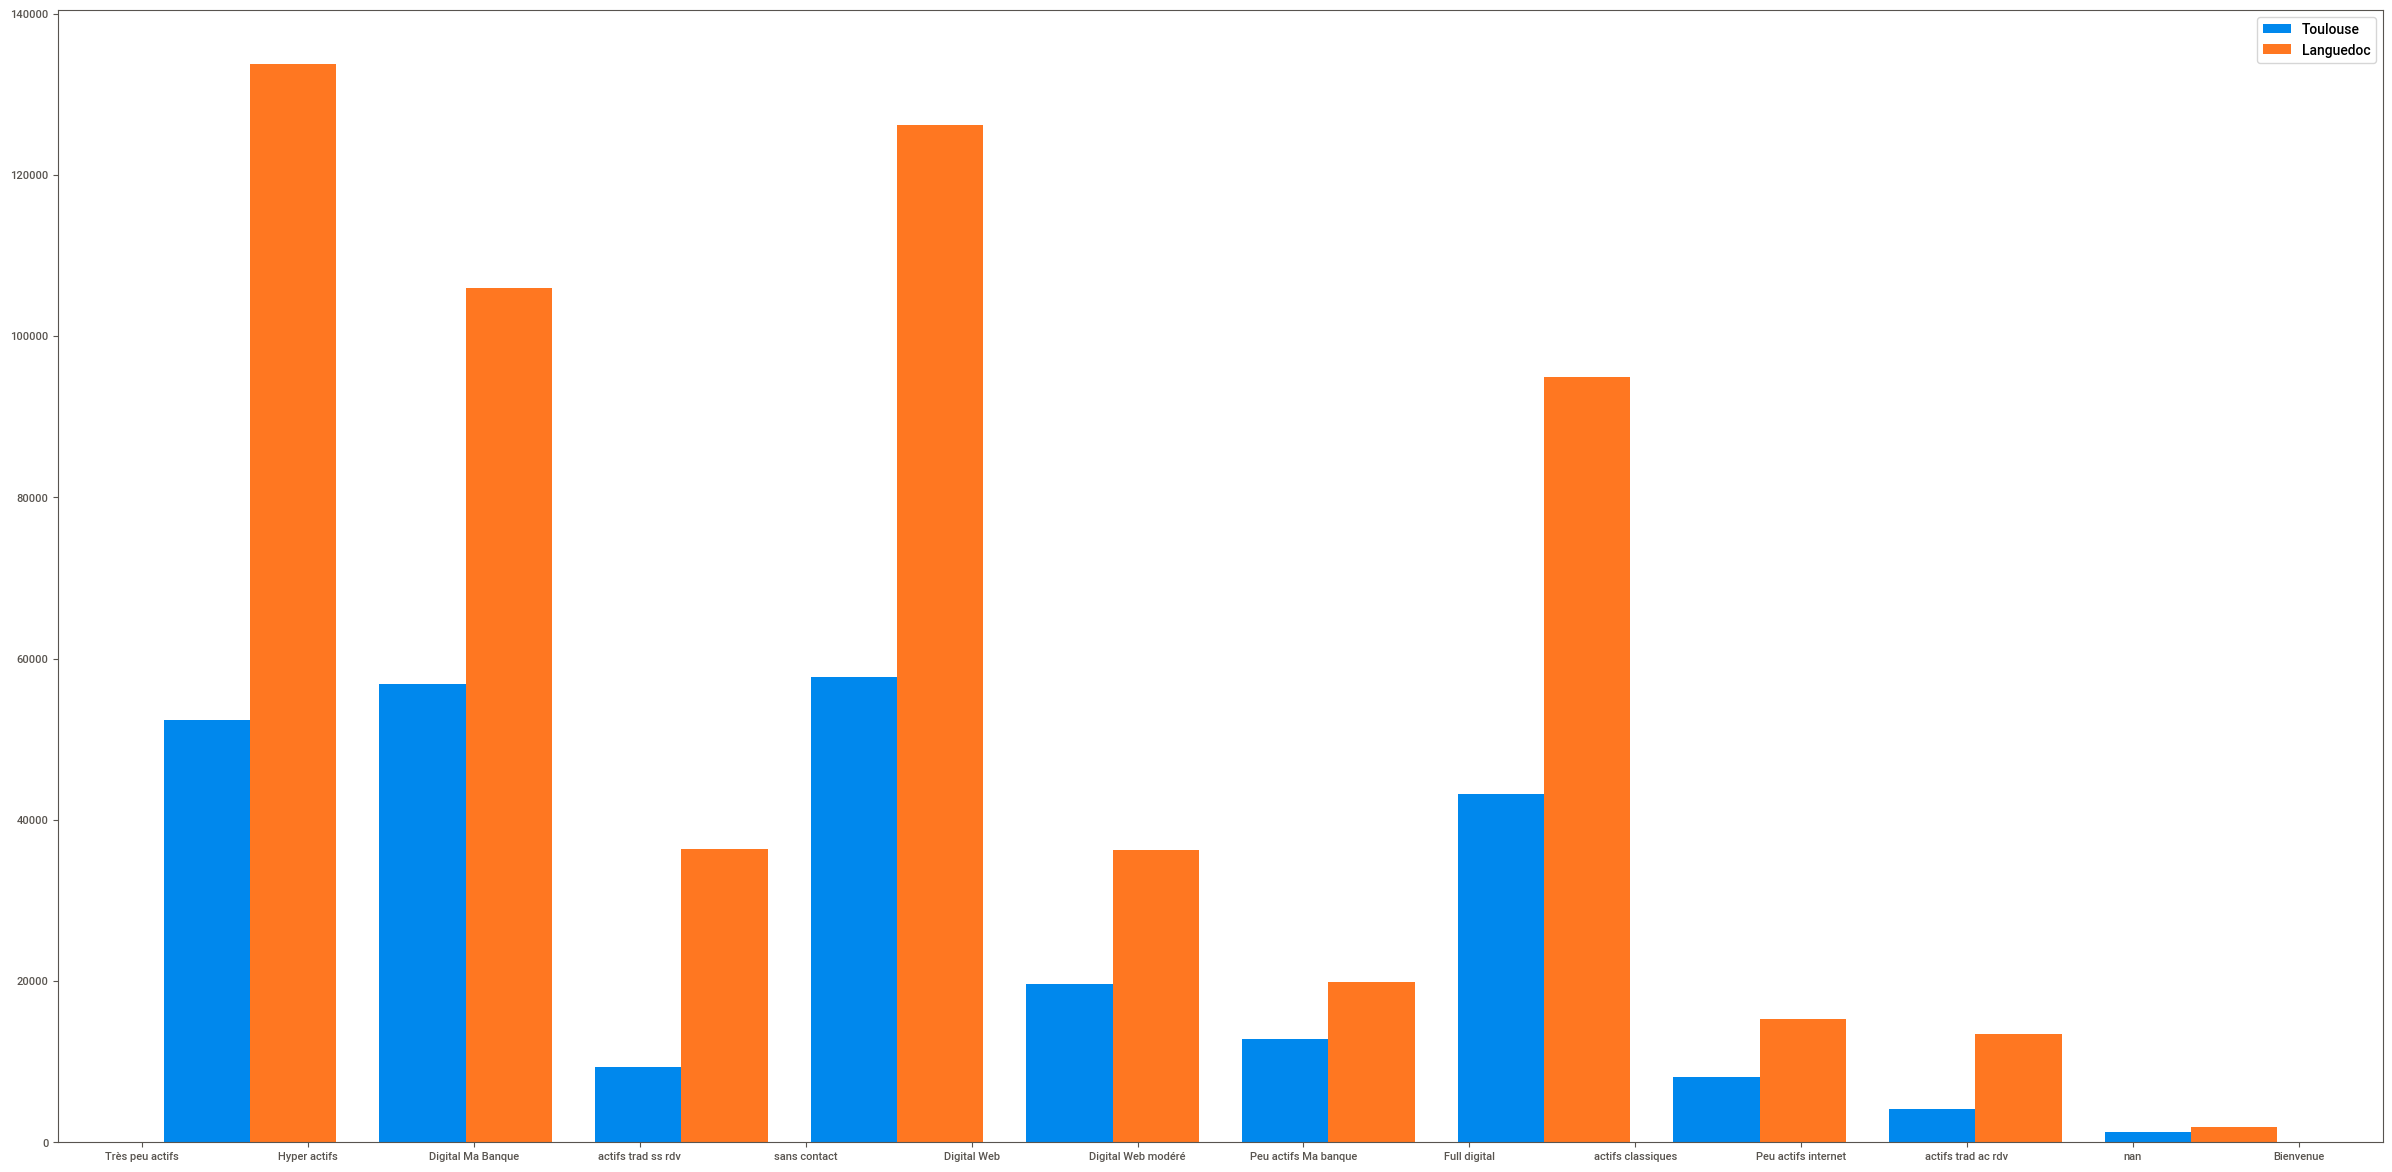

In [28]:
#En effectifs
plt.figure(figsize=(30,15))
plt.hist([df_jeu1_toulouse['profil'], df_jeu1_languedoc['profil']], label=['Toulouse', 'Languedoc'])
plt.legend()
plt.show()

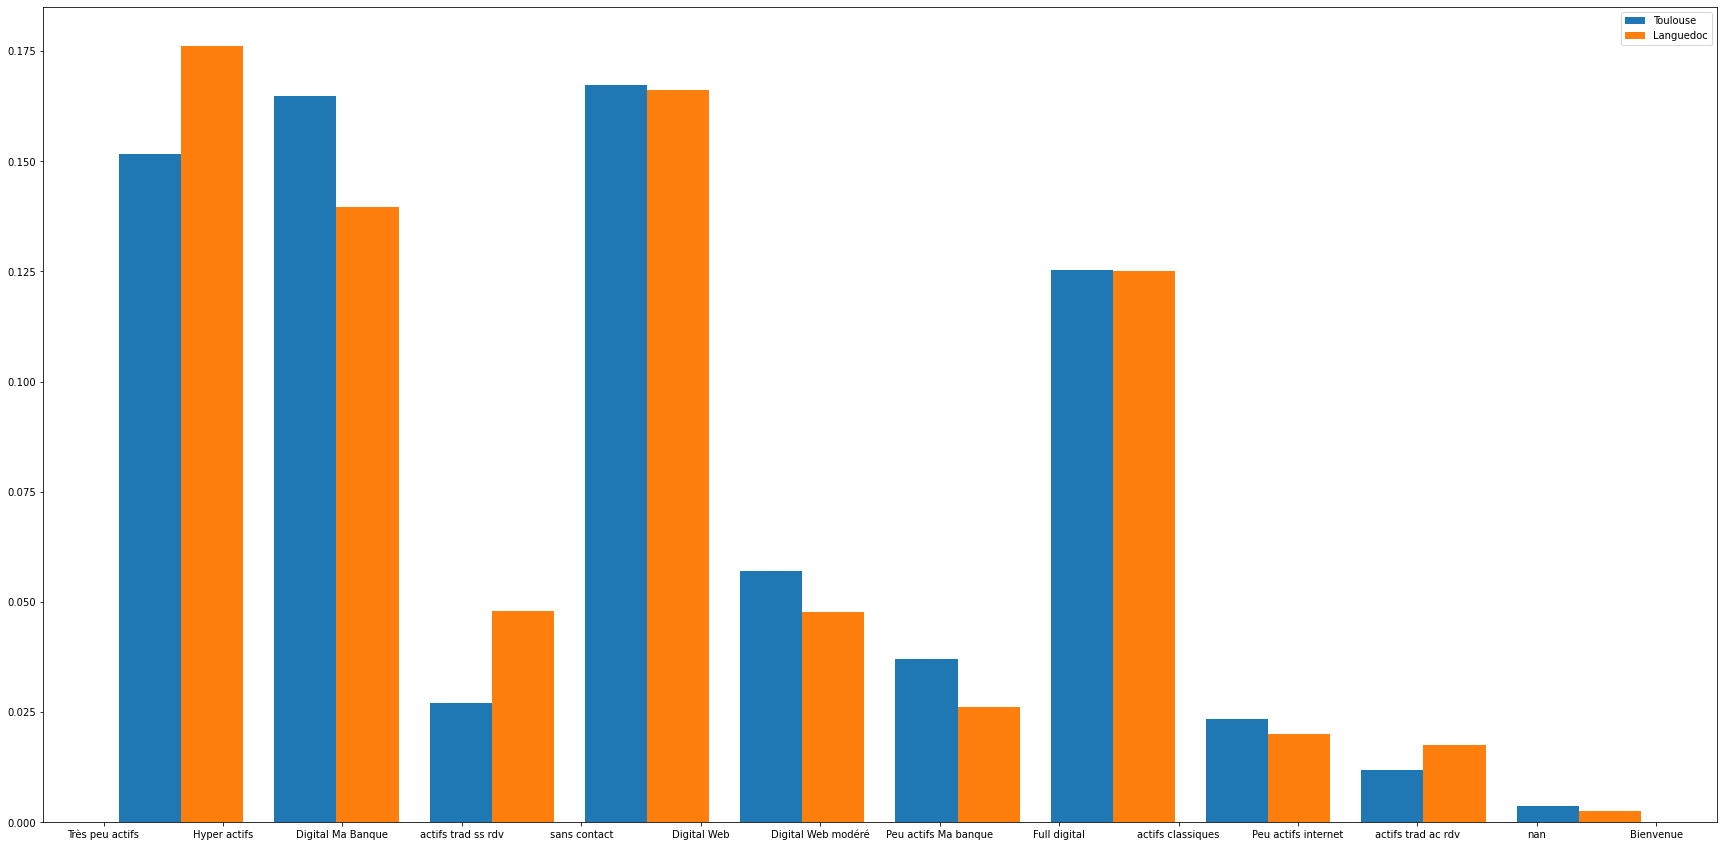

In [25]:
#En pourcentage
plt.figure(figsize=(30,15))
plt.hist([df_jeu1_toulouse['profil'], df_jeu1_languedoc['profil']], label=['Toulouse', 'Languedoc'], density=True)
plt.legend()
plt.show()

## Sweetviz

In [20]:
#!pip install sweetviz

In [4]:
import sweetviz as sv

KeyboardInterrupt: 

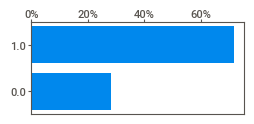

In [5]:
my_report = sv.analyze(data1, pairwise_analysis='off')
my_report.show_html("MyReport.html")

## Corrélations

In [6]:
import seaborn as sns

In [4]:
#Import échantillon10
data_ech10 = pd.read_csv('C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID/Interpromo/PIP_2022NA/DATA1/DATA1/ECHANTILLONS/ECHANTILLON10/echantillon10.csv')
data_ech10

ID  TOP_FRAUDE  TOP_FRAUDE_CARTE  \
0      831KFcsZovqRwkmyqAJhBfPGA==           1                 1   
1      835qrimyjXd7SPpng/cWuEz/w==           1                 1   
2      8353Z+loQUqfodVSdCZp3naCg==           1                 0   
3      831rqXmvv7DhGKOKHAmM/3tGw==           1                 0   
4      835M+SkL1tyzkjT6KCrMZlkNg==           1                 0   
...                            ...         ...               ...   
84930  835Lc+970tiDoDBovevaK4LYA==           0                 0   
84931  835a1IzTiIqW+DZI7N0vRVW5A==           0                 0   
84932  835cKBDV4caS5EOVeLxdsRZLQ==           0                 0   
84933  835CKVu+z3oofUX0nmQlmhgPw==           0                 0   
84934  835tPFj77Rqvv86c8MdZTvwJg==           0                 0   

       TOP_FRAUDE_VIREMENT Date_debut_fraude cp_ou_pays  \
0                        0         07JUL2020      SÎUVf   
1                        0               NaN      céyaÏ   
2                        1               NaN      tîêÅÊ   
3                        1         15OCT2020      æËYJ3   
4                        1               NaN      céÎYG   
...                    ...               ...        ...   
84930                    0               NaN      gíÇXN   
84931                    0               NaN      çÊpÀu   
84932                    0               NaN      ïÎkhw   
84933                    0               NaN      ÍlPFE   
84934                    0               NaN      P2PWÅ   

                       SECTEUR_GESTION    INDICMAIL    INDICTEL    INDICPOR  \
0                        SECTEUR OUEST   MAIL_OPTIN  TEL_NEUTRE   POR_OPTIN   
1                     SECTEUR ALES CVN   MAIL_OPTIN   TEL_OPTIN  POR_OPTOUT   
2              SECTEUR VALLEE DU RHONE  MAIL_OPTOUT   TEL_OPTIN  POR_OPTOUT   
3                        SECTEUR OUEST  MAIL_OPTOUT   TEL_OPTIN  POR_OPTOUT   
4                      SECTEUR BEZIERS   MAIL_OPTIN   TEL_OPTIN   POR_OPTIN   
...                                ...          ...         ...         ...   
84930  SECTEUR MONTPELLIER PIC ST LOUP   MAIL_OPTIN  TEL_OPTOUT   POR_OPTIN   
84931                 SECTEUR NARBONNE  MAIL_NEUTRE   TEL_OPTIN   POR_OPTIN   
84932                  SECTEUR BEZIERS  MAIL_NEUTRE   TEL_OPTIN  POR_NEUTRE   
84933                  SECTEUR BEZIERS  MAIL_NEUTRE   TEL_OPTIN  POR_NEUTRE   
84934        SECTEUR BEAUCAIROIS UZEGE  MAIL_NEUTRE   TEL_OPTIN  POR_NEUTRE   

       ... mt_factu_ttc_M mt_factu_ttc_M6  mt_reduc_ttc_M  mt_reduc_ttc_M6  \
0      ...          -46.0           130.0             0.0              0.0   
1      ...            7.0             6.0             0.0              0.0   
2      ...            0.0             0.0             0.0              0.0   
3      ...            2.0             2.0             0.0              0.0   
4      ...           28.0             6.0             0.0              0.0   
...    ...            ...             ...             ...              ...   
84930  ...           47.0             5.0             0.0              0.0   
84931  ...            6.0             6.0             0.0              0.0   
84932  ...            8.0             8.0             0.0              0.0   
84933  ...            6.0             6.0             0.0              0.0   
84934  ...            NaN             NaN             NaN              NaN   

       mt_rist_ttc_M  mt_rist_ttc_M6  Fidelite_calcule  Flag_bq_principale  \
0                0.0             0.0                FI                 1.0   
1                0.0             0.0                QF                 1.0   
2                0.0             0.0                NF                 0.0   
3                0.0             0.0                FI                 1.0   
4                0.0             0.0                FI                 1.0   
...              ...             ...               ...                 ...   
84930            0.0             0.0                QF                 1.0

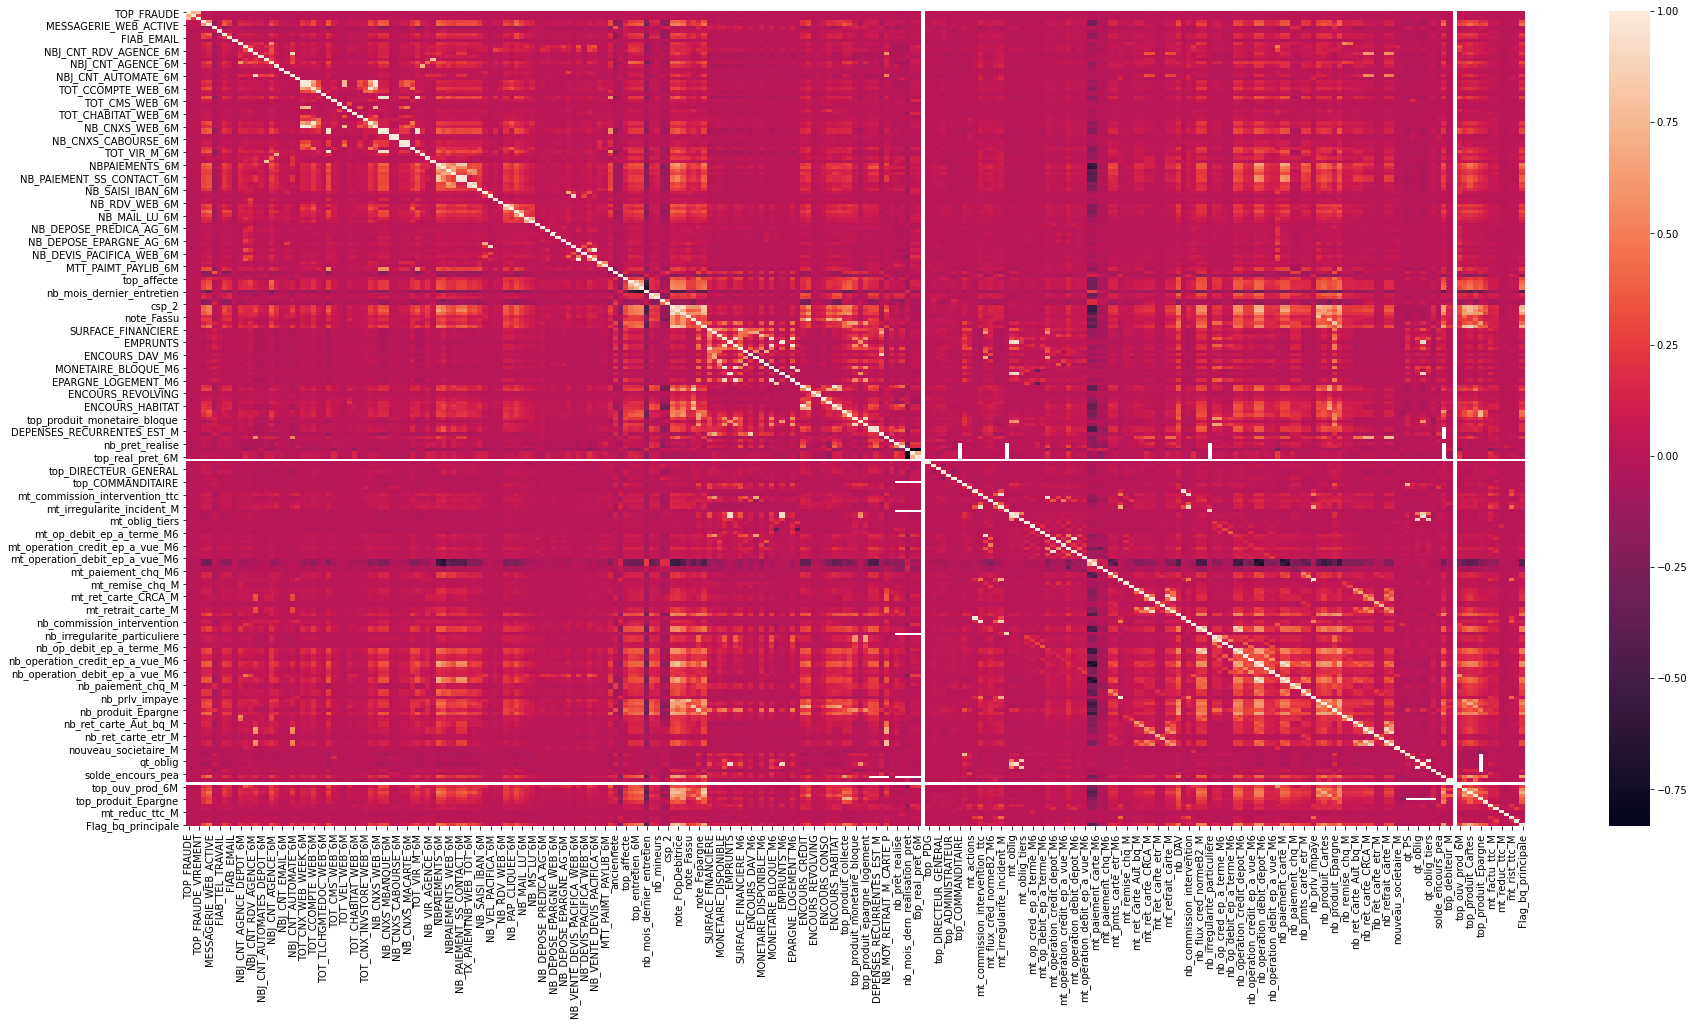

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(data_ech10.corr())

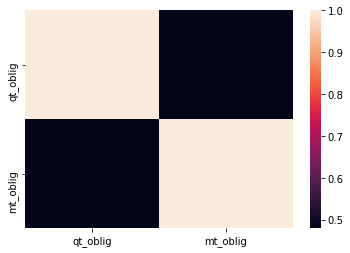

In [20]:
data_oblig = data_ech10[['qt_oblig', 'mt_oblig']]
sns.heatmap(data_oblig.corr())

## Remplissage des colonnes

In [148]:
#Dataframe retournant toutes les lignes ayant des valeurs nulles pour la variable INDICMAIL
data1[data1['INDICMAIL'].isnull()]

ID  TOP_FRAUDE  TOP_FRAUDE_CARTE  \
313     8313yU+CXiHnyfBCYpfJaArFg==           0                 0   
341     831NRA/nnLVQajoC4Cp72U8yQ==           0                 0   
617     831LzItZY5md+N8jd92OkQg3w==           0                 0   
917     831wIzCrIU29zF2+SwApHVh/A==           0                 0   
2906    831lB9lgrPDVc7bD5c2qK5t6w==           0                 0   
...                             ...         ...               ...   
847318  835yIiH7aia3MuM2HgB4IvG4g==           0                 0   
847342  835eARJqyqahr9Ce26zn5P7qQ==           0                 0   
848223  835M6UfG9I0LTpKWlTXA2s8Bw==           0                 0   
848364  835uSc6f6spjIYBX8N47l7LhA==           0                 0   
848401  835SPdIYsZq2sqE6EZx3+86HA==           0                 0   

        TOP_FRAUDE_VIREMENT Date_debut_fraude cp_ou_pays  \
313                       0         01MAY2021      8èéëj   
341                       0         01AUG2020      j9od0   
617                       0         01JUN2021      aXÏRa   
917                       0         01AUG2021      fTgÂä   
2906                      0         01APR2021      SÎUVf   
...                     ...               ...        ...   
847318                    0               NaN      èIMkç   
847342                    0               NaN      FÎ8Mê   
848223                    0               NaN      ÉAYOS   
848364                    0               NaN      tîêÅÊ   
848401                    0               NaN      0késÎ   

                        SECTEUR_GESTION INDICMAIL INDICTEL INDICPOR  ...  \
313                         SECTEUR SUD       NaN      NaN      NaN  ...   
341                         SECTEUR EST       NaN      NaN      NaN  ...   
617                        SECTEUR NORD       NaN      NaN      NaN  ...   
917                       SECTEUR OUEST       NaN      NaN      NaN  ...   
2906                        SECTEUR SUD       NaN      NaN      NaN  ...   
...                                 ...       ...      ...      ...  ...   
847318  SECTEUR HAUT LGDC COEUR HERAULT       NaN      NaN      NaN  ...   
847342                   SECTEUR LOZERE       NaN      NaN      NaN  ...   
848223                 SECTEUR NARBONNE       NaN      NaN      NaN  ...   
848364          SECTEUR VALLEE DU RHONE       NaN      NaN      NaN  ...   
848401                 SECTEUR ALES CVN       NaN      NaN      NaN  ...   

       mt_factu_ttc_M mt_factu_ttc_M6  mt_reduc_ttc_M  mt_reduc_ttc_M6  \
313               NaN             NaN             NaN              NaN   
341               NaN             NaN             NaN              NaN   
617               7.0             6.0             0.0              0.0   
917               0.0             2.0             0.0              0.0   
2906             24.0            55.0             0.0              0.0   
...               ...             ...             ...              ...   
847318          -10.0            53.0             0.0              0.0   
847342            3.0            15.0             0.0              0.0   
848223           41.0            40.0             0.0              0.0   
848364            0.0             1.0             0.0              0.0   
848401            NaN             NaN             NaN              NaN   

        mt_rist_ttc_M  mt_rist_ttc_M6  Fidelite_calcule  Flag_bq_principale  \
313               NaN             NaN                NF                 0.0   
341               NaN             NaN               NaN                 NaN   
617               0.0             0.0                QF                 1.0   
917               0.0             2.0                QF                 0.0   
2906              0.0             0.0                FI                 1.0   
...               ...             ...               ...                 ...   
847318            0.0             0.0                QF                 1.0   
847342            0.0             0.0            

In [151]:
#Individus fraudés parmi les lignes ayant des valeurs manquantes pour la variable 'INDICMAIL'
data_nan = data1[data1['INDICMAIL'].isnull()]
data_nan[data_nan['TOP_FRAUDE']==1]

ID  TOP_FRAUDE  TOP_FRAUDE_CARTE  \
58528   831PoZEV7F8CnGwOewm9VI6Sw==           1                 0   
146184  831yWlVPiFsOhhWlFC/oFph8Q==           1                 1   
250251  831S8m2qsya+LvwZaiNfpMoSg==           1                 1   
426588  835RjZDmmZ60Zlc8oP0wEv7jQ==           1                 1   
517495  835K6q+3qZzvzXooIql9faKgg==           1                 1   
632999  8357SExxve5SY7bMv6t3PdQ7A==           1                 1   
685435  835J+XRA/lPGdiqh4MOuyaNjg==           1                 1   
685795  8353S58wuwOKu30KfnJV9M9PA==           1                 1   
840718  8358A2FrLqTByrQ50M+KjmOMg==           1                 1   
842583  835LPpS6ZtrL9YMmhYEBCUjlw==           1                 1   

        TOP_FRAUDE_VIREMENT Date_debut_fraude cp_ou_pays  \
58528                     1         25FEB2021      ÂhcOÆ   
146184                    0         15AUG2020      ç0fèÂ   
250251                    0         24OCT2020      å3èJ3   
426588                    0               NaN      gíÇXN   
517495                    0               NaN      UwamP   
632999                    0               NaN      îX1Éj   
685435                    0               NaN      LPÅCf   
685795                    0               NaN      UwamP   
840718                    0               NaN      æDhkG   
842583                    0               NaN      åoL3ë   

                        SECTEUR_GESTION INDICMAIL INDICTEL INDICPOR  ...  \
58528                       SECTEUR SUD       NaN      NaN      NaN  ...   
146184                      SECTEUR EST       NaN      NaN      NaN  ...   
250251                   SECTEUR CENTRE       NaN      NaN      NaN  ...   
426588  SECTEUR MONTPELLIER CENTRE UNIV       NaN      NaN      NaN  ...   
517495  SECTEUR MONTPELLIER CENTRE UNIV       NaN      NaN      NaN  ...   
632999                    SECTEUR NIMES       NaN      NaN      NaN  ...   
685435                 SECTEUR NARBONNE       NaN      NaN      NaN  ...   
685795  SECTEUR MONTPELLIER CENTRE UNIV       NaN      NaN      NaN  ...   
840718        SECTEUR CASTELNAUDARY HVA       NaN      NaN      NaN  ...   
842583                 SECTEUR ALES CVN       NaN      NaN      NaN  ...   

       mt_factu_ttc_M mt_factu_ttc_M6  mt_reduc_ttc_M  mt_reduc_ttc_M6  \
58528             NaN             NaN             NaN              NaN   
146184            NaN             NaN             NaN              NaN   
250251            NaN             NaN             NaN              NaN   
426588            NaN             NaN             NaN              NaN   
517495            NaN             NaN             NaN              NaN   
632999            NaN             NaN             NaN              NaN   
685435            NaN             NaN             NaN              NaN   
685795            NaN             NaN             NaN              NaN   
840718            NaN             NaN             NaN              NaN   
842583            NaN             NaN             NaN              NaN   

        mt_rist_ttc_M  mt_rist_ttc_M6  Fidelite_calcule  Flag_bq_principale  \
58528             NaN             NaN               NaN                 NaN   
146184            NaN             NaN               NaN                 NaN   
250251            NaN             NaN               NaN                 NaN   
426588            NaN             NaN               NaN                 NaN   
517495            NaN             NaN               NaN                 NaN   
632999            NaN             NaN               NaN                 NaN   
685435            NaN             NaN               NaN                 NaN   
685795            NaN             NaN               NaN                 NaN   
840718            NaN             NaN               NaN                 NaN   
842583            NaN             NaN               NaN                 NaN   

        profil  localisation  
58528      NaN      toulouse  
146184     NaN      toulouse

In [153]:
data1['INDICMAIL'].value_counts()

MAIL_OPTIN     374581
MAIL_NEUTRE    237445
MAIL_OPTOUT    236293
Name: INDICMAIL, dtype: int64

In [154]:
#On remplace les valeurs manquantes de la variable INDICMAIL par la valeur de la ligne précédente
data1['INDICMAIL'] = data1['INDICMAIL'].fillna(method='pad')
data1['INDICMAIL'].isnull().sum()

0